In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import  matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [ ]:
dt=pd.read_csv("credit_card_fraud_dataset.csv")
dt.head(10)

,TransactionID,Amount,Time,CardType,Location,TransactionType,PreviousTransactions,Fraud
0,1,31139.11,57134,Visa,Hyderabad,POS,81,0
1,2,78913.08,20491,Visa,Pune,POS,47,0
2,3,60777.58,1341,Discover,Pune,POS,39,0
3,4,49721.98,44623,Visa,Hyderabad,POS,96,0
4,5,13019.38,338,MasterCard,Kolkata,ATM,62,0
5,6,13017.72,71431,MasterCard,Bangalore,ATM,75,0
6,7,4899.49,12254,Visa,Kolkata,ATM,71,0
7,8,71903.73,51860,MasterCard,Delhi,ATM,87,0
8,9,49925.33,11344,Visa,Ahmedabad,Online,79,0
9,10,58793.88,1750,Visa,Delhi,ATM,3,1


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         1000 non-null   int64  
 1   Amount                1000 non-null   float64
 2   Time                  1000 non-null   int64  
 3   CardType              1000 non-null   object 
 4   Location              1000 non-null   object 
 5   TransactionType       1000 non-null   object 
 6   PreviousTransactions  1000 non-null   int64  
 7   Fraud                 1000 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 62.6+ KB


In [ ]:
dt.isnull().sum()
dt.duplicated().sum()

0

In [ ]:
dt.columns

Index(['TransactionID', 'Amount', 'Time', 'CardType', 'Location',
       'TransactionType', 'PreviousTransactions', 'Fraud'],
      dtype='object')

In [ ]:
dt['Amount']=dt['Amount'].astype(int)

In [ ]:
df=dt.copy()
enc=LabelEncoder()
cat_col=['CardType','Location','TransactionType']
for i in cat_col:
  df.loc[:,i]=enc.fit_transform(df.loc[:,i])
df['Amount']=df['Amount'].astype(int)
df.head()

,TransactionID,Amount,Time,CardType,Location,TransactionType,PreviousTransactions,Fraud
0,1,31139,57134,3,4,2,81,0
1,2,78913,20491,3,9,2,47,0
2,3,60777,1341,1,9,2,39,0
3,4,49721,44623,3,4,2,96,0
4,5,13019,338,2,6,0,62,0
5,6,13017,71431,2,1,0,75,0
6,7,4899,12254,3,6,0,71,0
7,8,71903,51860,2,3,0,87,0
8,9,49925,11344,3,0,1,79,0
9,10,58793,1750,3,3,0,3,1


In [ ]:
df.corr()

,TransactionID,Amount,Time,CardType,Location,TransactionType,PreviousTransactions,Fraud
TransactionID,1.000000,-0.024495,-0.024669,-0.027512,0.014792,-0.015387,-0.014476,-0.005595
Amount,-0.024495,1.000000,0.008436,0.033478,-0.110691,0.003371,-0.024412,-0.005689
Time,-0.024669,0.008436,1.000000,-0.027185,-0.056468,0.061112,0.022101,0.019262
CardType,-0.027512,0.033478,-0.027185,1.000000,0.057023,0.003350,0.037082,0.004141
Location,0.014792,-0.110691,-0.056468,0.057023,1.000000,-0.014186,0.023838,-0.024795
TransactionType,-0.015387,0.003371,0.061112,0.003350,-0.014186,1.000000,0.028297,0.016229
PreviousTransactions,-0.014476,-0.024412,0.022101,0.037082,0.023838,0.028297,1.000000,-0.063757
Fraud,-0.005595,-0.005689,0.019262,0.004141,-0.024795,0.016229,-0.063757,1.000000


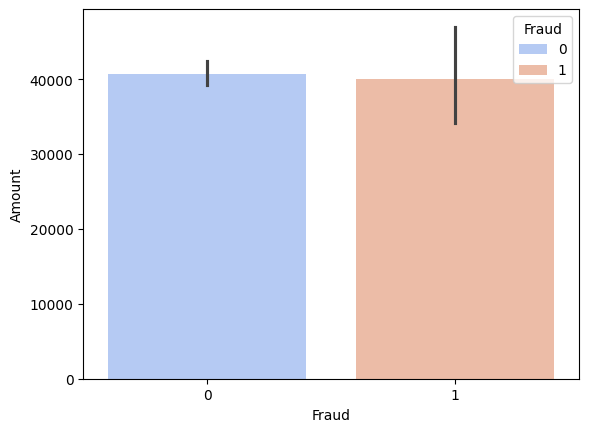

,count
Fraud,
0,958
1,42


In [ ]:
sns.barplot(x='Fraud',y='Amount',data=df,palette='coolwarm',hue='Fraud')
plt.show()
df['Fraud'].value_counts()

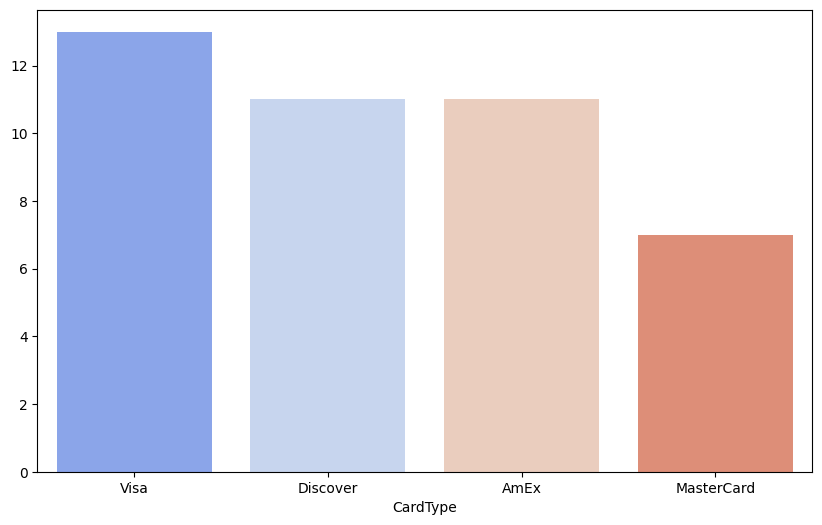

In [ ]:
fraud_counts=dt[dt['Fraud']==1]['CardType'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=fraud_counts.index,y=fraud_counts.values,palette='coolwarm',hue=fraud_counts.index)
plt.show()

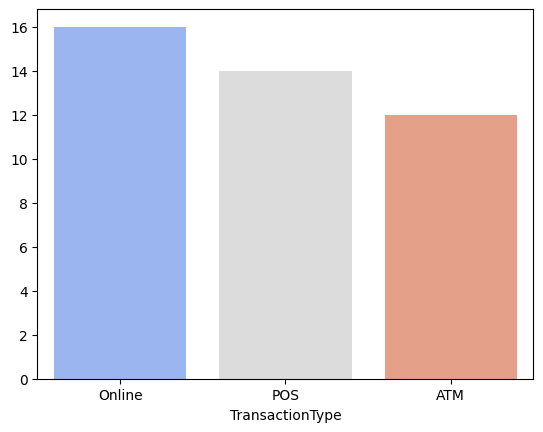

In [ ]:
tfraud_counts=dt[dt['Fraud']==1]["TransactionType"].value_counts()
sns.barplot(x=tfraud_counts.index,y=tfraud_counts.values,palette='coolwarm',hue=tfraud_counts.index)
plt.show()

Location
Mumbai       7
Delhi        6
Ahmedabad    6
Hyderabad    6
Jaipur       5
Bangalore    4
Chennai      3
Pune         3
Kolkata      1
Lucknow      1
Name: count, dtype: int64


<Axes: xlabel='Location'>

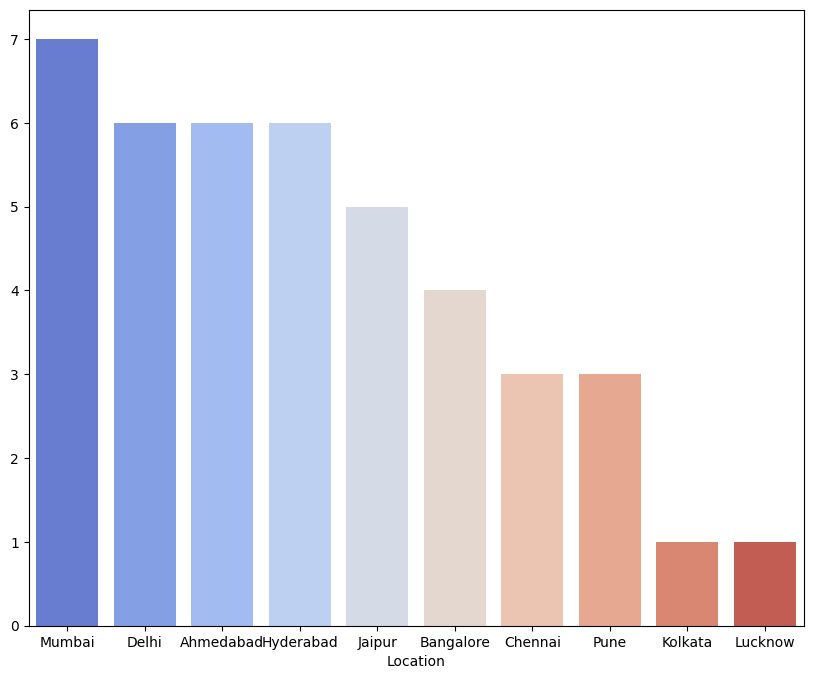

In [ ]:
plt.figure(figsize=(10,8))
lfraud_counts=dt[dt['Fraud']==1]["Location"].value_counts()
print(lfraud_counts)
sns.barplot(x=lfraud_counts.index,y=lfraud_counts.values,palette='coolwarm',hue=lfraud_counts.index)

<Axes: xlabel='PreviousTransactions'>

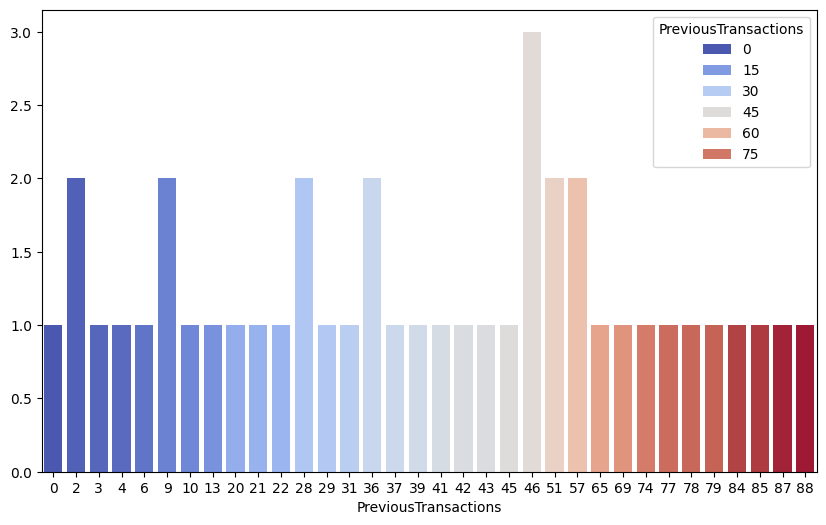

In [ ]:
pfraud_counts=dt[dt['Fraud']==1]['PreviousTransactions'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=pfraud_counts.index,y=pfraud_counts.values,palette='coolwarm',hue=pfraud_counts.index)

In [ ]:
dt['CardType'].value_counts()

,count
CardType,
Discover,276
Visa,248
MasterCard,241
AmEx,235


In [ ]:
x=dt[['Amount','CardType','TransactionType','PreviousTransactions']]
y=dt['Fraud']
cat_col=['CardType','TransactionType']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
label_encoders={}
for col in cat_col:
   enc=LabelEncoder()
   x_train[col]=enc.fit_transform(x_train[col])
   label_encoders[col]=enc
smote=SMOTE(sampling_strategy='auto',random_state=42)
x_train,y_train=smote.fit_resample(x_train,y_train)
print(x_train.shape,",",y_train.shape)
print(y_train.value_counts())
print(x_train,"\n",y_train)

(800, 4)
(1534, 4) , (1534,)
Fraud
0    767
1    767
Name: count, dtype: int64
            Amount  CardType  TransactionType  PreviousTransactions
0      3934.200000         1                2                    66
1     78420.060000         3                0                    11
2     50713.830000         3                1                    95
3      2469.250000         0                2                    41
4     75939.190000         1                2                    92
...            ...       ...              ...                   ...
1529  75646.256172         1                1                    42
1530  78219.526757         1                0                    43
1531   5515.858306         1                1                    53
1532  32606.115685         0                1                    32
1533   4198.466919         1                1                    18

[1534 rows x 4 columns] 
 0       0
1       0
2       0
3       0
4       0
       ..
1529    1
1530    

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
print(x_train)

[[-1.52215656 -0.30133504  1.56047746  0.81893568]
 [ 1.59938565  1.69111304 -1.15047659 -1.27964297]
 [ 0.43824704  1.69111304  0.20500044  1.92545897]
 ...
 [-1.45590038 -0.30133504  0.20500044  0.322908  ]
 [-0.32061887 -1.29755908  0.20500044 -0.47836748]
 [-1.51109291 -0.30133504  0.20500044 -1.01255114]]


In [ ]:
for col in cat_col:
  enc=label_encoders[col]
  x_test.loc[:,col]=enc.transform(x_test.loc[:,col])
x_test=sc.transform(x_test)
print(x_test)

[[-0.36001217  1.69111304 -1.15047659  1.77283507]
 [ 1.15398986  0.694889   -1.15047659 -1.24148699]
 [-0.07579367  1.69111304 -1.15047659  0.43737593]
 [-0.44617455 -1.29755908  1.56047746  1.58205519]
 [ 1.61778316 -1.29755908  1.56047746  0.05581617]
 [ 1.68521276 -1.29755908 -1.15047659 -1.5467348 ]
 [-0.07633847  1.69111304  1.56047746 -0.36389956]
 [ 1.32589553 -0.30133504 -1.15047659  1.88730299]
 [-1.45522985  1.69111304  0.20500044  0.24659605]
 [ 0.11916128 -1.29755908  0.20500044  0.36106398]
 [ 1.23147733 -0.30133504  0.20500044 -1.47042284]
 [ 0.99650046 -1.29755908 -1.15047659  0.93340361]
 [ 0.16718758  0.694889    1.56047746  0.85709166]
 [-0.9366631  -0.30133504  0.20500044 -0.78361529]
 [-1.27439782 -1.29755908  1.56047746 -0.24943163]
 [-1.3864592  -1.29755908  0.20500044  0.09397215]
 [ 1.40908246 -1.29755908  1.56047746  1.04787153]
 [-1.32179551 -1.29755908  0.20500044 -0.09680773]
 [-0.60035324  0.694889   -1.15047659 -0.24943163]
 [-0.81399905  1.69111304  1.56

In [ ]:
# classifier=LogisticRegression(solver="lbfgs",max_iter=1000)
classifier=RandomForestClassifier(criterion='gini',random_state=42,max_depth=100,n_estimators=100)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(y_test,"\n")
print("predicted \n",y_pred)

521    0
737    0
740    0
660    0
411    1
      ..
408    0
332    0
208    0
613    0
78     0
Name: Fraud, Length: 200, dtype: int64 

predicted 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0]


In [ ]:
print("accuracy score is: ",accuracy_score(y_test,y_pred)*100,"%")
print("Classification report is: ",classification_report(y_test,y_pred))

accuracy score is:  83.0 %
Classification report is:                precision    recall  f1-score   support

           0       0.95      0.87      0.91       191
           1       0.00      0.00      0.00         9

    accuracy                           0.83       200
   macro avg       0.47      0.43      0.45       200
weighted avg       0.91      0.83      0.87       200



In [ ]:
def prediction():
  Amount=int(input("enter the amount: "))
  CardType=input("enter the card type: ")
  TransactionType=input("enter the transaction type: ")
  PreviousTransactions=int(input("enter the previous transactions: "))
  data=pd.DataFrame({"Amount":Amount,"CardType":CardType,"TransactionType":TransactionType,"PreviousTransactions":PreviousTransactions},index=[0])
  for col in cat_col:
    enc=label_encoders[col]
    data.loc[:,col]=enc.transform(data.loc[:,col])
  data=sc.transform(data)
  pred=classifier.predict(data)
  if pred==1:
    print("Fraud detected")
  else:
    print("Trust worthy")
prediction()


enter the amount: 58793
enter the card type: Visa
enter the transaction type: ATM
enter the previous transactions: 3
Fraud detected
